In [1]:
#import required librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
#make_blobs is used for data generation
make_blobs?

In [4]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=10)

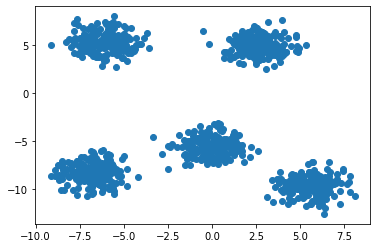

In [5]:
plt.scatter(x[:,0],x[:,1])#plotting the dataset acquired
plt.show()

In [6]:
k=5 #number of centres taken is 5
colors=["green","blue","red","yellow","gray"]#to assign a unique color for each cluster
clusters={}
for each_cluster in range(k):
    #step 1: To initialize cluster centers randomly
    center=10*(2*np.random.random((x.shape[1],))-1)#chose random points from the range -10 to 10 as the range of x-axis in graph is from -10 to 10
    points=[]
    cluster={
        'center':center,#store the centre
        'points':points,#store the points of coreresponding cluster
        'color':colors[each_cluster]#store color of corresponding cluster
    }
    clusters[each_cluster]=cluster#store the all clusters info in a cluster dictionary

In [7]:
clusters#print the clusters dictionary(info acquired till now regarding to each cluster)

{0: {'center': array([0.79208097, 1.33603195]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 1.68702863, -4.41630633]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([-7.02953097, -2.35341884]),
  'points': [],
  'color': 'red'},
 3: {'center': array([-0.87084995, -4.81002385]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-3.53385613,  8.43128045]),
  'points': [],
  'color': 'gray'}}

In [8]:
#step 2: Distance and assigning points to the clusters

In [9]:
#return euclidean distance between 2 points(vectors)
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [10]:
#Assigning every data point to one of the cluster
#Expectation Step(E-step)
def assignPointsToClusters(clusters):
    for every_data_point in range(x.shape[0]):#iterate over all the points in the cluster
        curr_x = x[every_data_point]
        dist=[]
        for kx in range(k):#findout distance from everypoint to centre of every cluster
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)#retrieve the cluster which is shortest distance from the current point
        clusters[current_cluster]['points'].append(curr_x)

In [11]:
#step 3
#Minimisation Step(M-Step)
# update your cluster center by taking mean

def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])#retrieve the points from the corresponding cluster
        if pts.shape[0]>0:
            #finding the mean
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u#assigining the updated center
            clusters[kx]['points']=[]#emptying the points array for the next cluster points

In [12]:
#plot the clusters with updated centres
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])#retrieve the points from the corresponding cluster
        if pts.shape[0]>0:#if there are points in the corresponding cluster
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker='*')

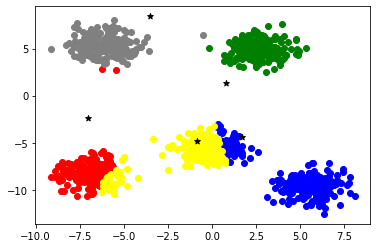

In [13]:
assignPointsToClusters(clusters)
plotClusters(clusters)


In [14]:
# repeat these three functions few times for updation of cluster centres
#Because of updation of cluster centre a better cluster can be formed

count = 0
while True:
    assignPointsToClusters(clusters)
    updateClusters(clusters)
    count+=1
    if(count >= 100):
        break

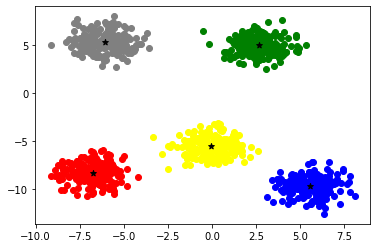

In [15]:
assignPointsToClusters(clusters)
plotClusters(clusters)